<a href="https://colab.research.google.com/github/robertherreraaa/Advanced-Machine-Learning/blob/main/Customer_Support_Ticket_Dataset_Project_Robert_Herrera.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import pipeline
import zipfile

In [ ]:
zip_file_path = r'/content/drive/MyDrive/Uplift Datasets/Customer Support Ticket Dataset.zip'
file_folder_path = r'/content/drive/MyDrive/Uplift Datasets/'

In [ ]:
with zipfile.ZipFile(zip_file_path) as zip_ref:
  zip_ref.extractall(file_folder_path)

In [ ]:
file_path = r'/content/drive/MyDrive/Uplift Datasets/customer_support_tickets.csv'

In [ ]:
df = pd.read_csv(file_path)

In [ ]:
df.head(5)

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaN,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaN,NaN
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8469 entries, 0 to 8468
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticket ID                     8469 non-null   int64  
 1   Customer Name                 8469 non-null   object 
 2   Customer Email                8469 non-null   object 
 3   Customer Age                  8469 non-null   int64  
 4   Customer Gender               8469 non-null   object 
 5   Product Purchased             8469 non-null   object 
 6   Date of Purchase              8469 non-null   object 
 7   Ticket Type                   8469 non-null   object 
 8   Ticket Subject                8469 non-null   object 
 9   Ticket Description            8469 non-null   object 
 10  Ticket Status                 8469 non-null   object 
 11  Resolution                    2769 non-null   object 
 12  Ticket Priority               8469 non-null   object 
 13  Tic

In [ ]:
duplicate = df.duplicated().any()
duplicate

np.False_

So there are no duplicate rows in the data

In [ ]:
cat_cols  = df.select_dtypes(['object']).columns
int_cols  = df.select_dtypes(['int64']).columns
float_cols = df.select_dtypes(['float']).columns
print(cat_cols)
print(int_cols)
print(float_cols)

Index(['Customer Name', 'Customer Email', 'Customer Gender',
       'Product Purchased', 'Date of Purchase', 'Ticket Type',
       'Ticket Subject', 'Ticket Description', 'Ticket Status', 'Resolution',
       'Ticket Priority', 'Ticket Channel', 'First Response Time',
       'Time to Resolution'],
      dtype='object')
Index(['Ticket ID', 'Customer Age'], dtype='object')
Index(['Customer Satisfaction Rating'], dtype='object')


# Cleaning the Data

In [ ]:
#Convert to datetime
df['Date of Purchase'] = pd.to_datetime(df['Date of Purchase'], format = '%Y-%m-%d')
df['First Response Time'] = pd.to_datetime(df['First Response Time'], format = '%Y-%m-%d %H:%M:%S')
df['Time to Resolution'] = pd.to_datetime(df['Time to Resolution'], format = '%Y-%m-%d %H:%M:%S')

In [ ]:
df_ticket = df.drop(columns = ['Ticket ID'], axis = 1)

In [ ]:
#Cleaning data
df_ticket['Resolution'] = df_ticket['Resolution'].fillna('None')
df_ticket['First Response Time'] = df_ticket['First Response Time'].fillna('No response')
df_ticket['Time to Resolution'] = df_ticket['Time to Resolution'].fillna('No resolution')
df_ticket['Customer Satisfaction Rating'] = df_ticket['Customer Satisfaction Rating'].fillna('No rating')

In [ ]:
df_ticket.isnull().sum()

,0
Customer Name,0
Customer Email,0
Customer Age,0
Customer Gender,0
Product Purchased,0
Date of Purchase,0
Ticket Type,0
Ticket Subject,0
Ticket Description,0
Ticket Status,0


This was done to check if there is anything missing after the data cleaning

# Exploratory Part of the Whole Dataset

### Distribution of Age

In [ ]:
print(df_ticket['Customer Age'].max())
print(df_ticket['Customer Age'].min())

70
18


💬 Comment:

The range of customer age from 18 to 70 years old.
I will class them into 3 kinds of customer: Young, Middle Age and Old.

In [ ]:
age = []
for result in df_ticket['Customer Age']:
    if result<=30:
        age.append('Young Customer')
    elif 30<result<55:
        age.append('Middle Age Customer')
    else:
        age.append('Old Customer')
df_ticket['Type of Customer'] = age

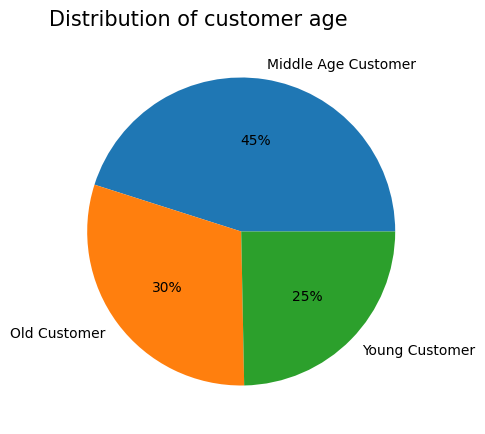

In [ ]:
chart_age = df_ticket['Type of Customer'].value_counts()
chart_gen = df_ticket['Customer Gender'].value_counts()
plt.figure(figsize = (10,5))
plt.pie(chart_age, labels = chart_age.index, autopct='%.0f%%')
plt.title('Distribution of customer age', loc = 'left', pad = 10, size = 15)
plt.show()

💬 Comment: Most of customer age is more than 30 and the middle age customer is the main target buying most produce.

### Distribution of Gender

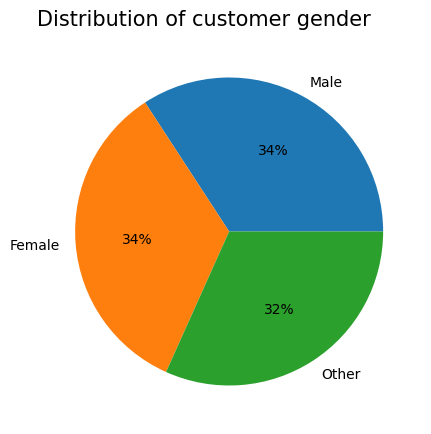

In [ ]:
chart_gen = df_ticket['Customer Gender'].value_counts()
plt.figure(figsize = (10,5))
plt.pie(chart_gen, labels = chart_gen.index, autopct='%.0f%%')
plt.title('Distribution of customer gender', loc = 'left', pad = 10, size = 15)
plt.show()

💬 Comment: Customer in this dataset reach a balance value in distribution of gender.

### Distribution of Product

In [ ]:
unique = len(df_ticket['Product Purchased'].unique())
print(f' Total of products was purchased: {unique}')

 Total of products was purchased: 42


/tmp/ipython-input-1814665677.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_counts.values, y=product_counts.index, palette='viridis')


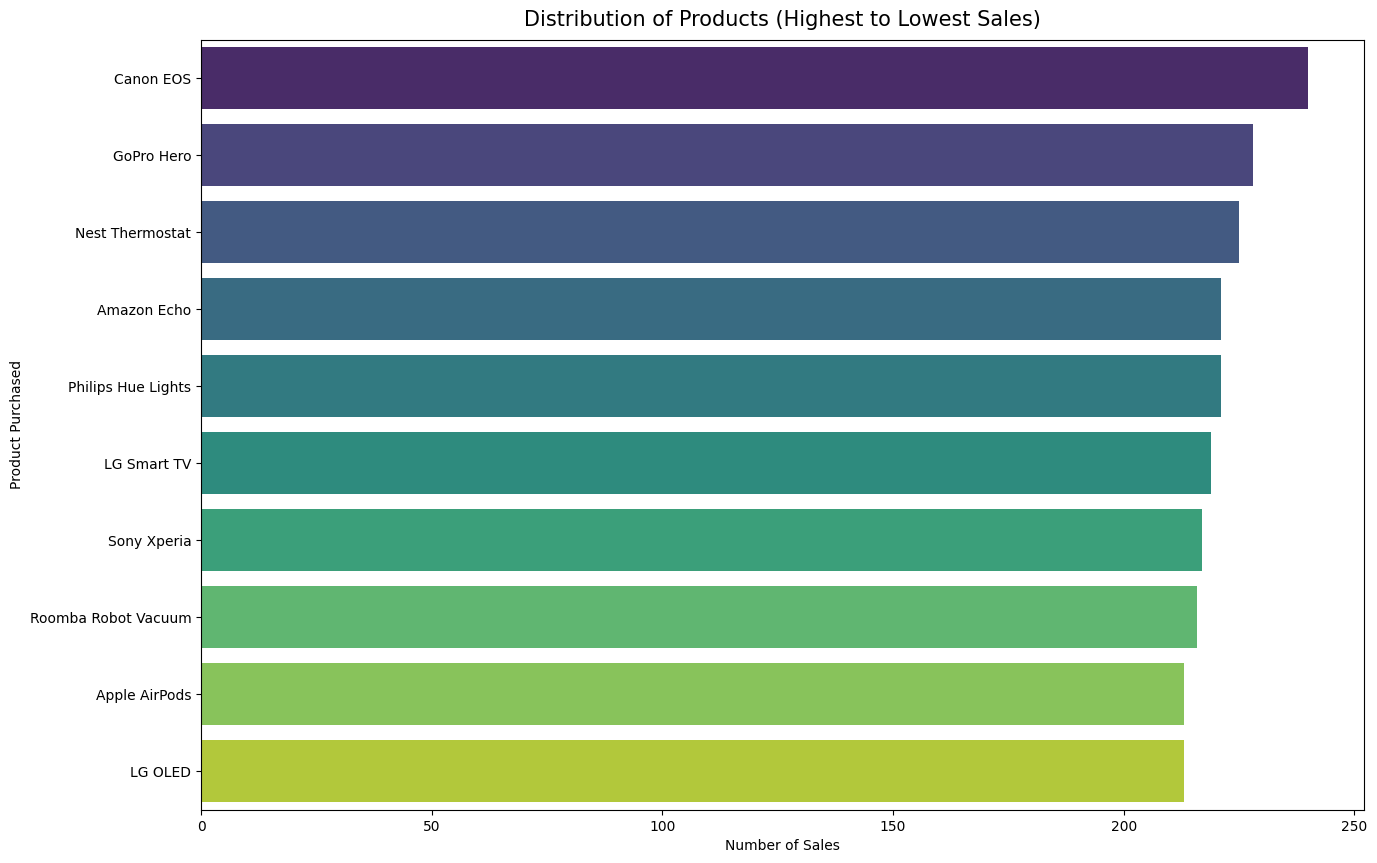

In [ ]:
#Plot chart
plt.figure(figsize=(15, 10))

# Count and sort products by frequency
product_counts = df_ticket['Product Purchased'].value_counts(ascending=False).head(10)

# Use seaborn.barplot to plot the distribution with custom order
sns.barplot(x=product_counts.values, y=product_counts.index, palette='viridis')

plt.title('Distribution of Products (Highest to Lowest Sales)', loc='center', pad=10, size=15)
plt.xlabel('Number of Sales')
plt.ylabel('Product Purchased')
plt.show()

💬 Comment:: Cannon EOS, Go Pro Hero, and Nest Thermostat are the top three products have the most pruchased.

### Distribution of Ticket Channel

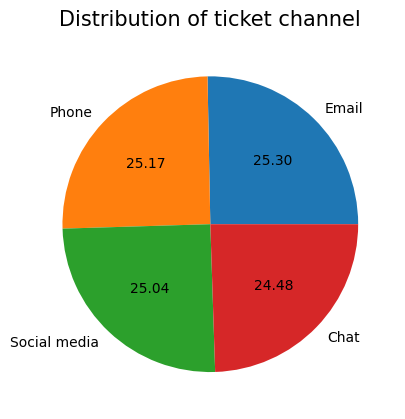

In [ ]:
chart_chan = df_ticket['Ticket Channel'].value_counts()
plt.pie(chart_chan, labels = chart_chan.index, autopct = '%.2f')
plt.title('Distribution of ticket channel', loc = 'center', pad = 10, size = 15)
plt.show()

💬 Comment: This company has 4 channel for customer to find the technical staff and the usage level of each channel don't have too much different.

### Distribution of Ticket Priority

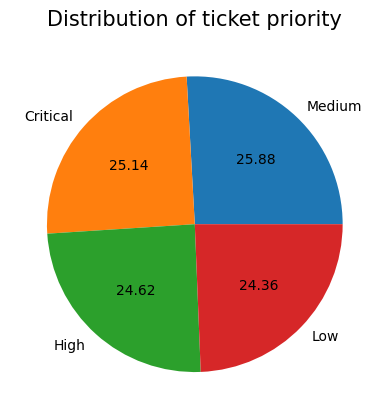

In [ ]:
chart_prio = df_ticket['Ticket Priority'].value_counts()
plt.pie(chart_prio, labels = chart_prio.index, autopct = '%.2f')
plt.title('Distribution of ticket priority', loc = 'center', pad = 10, size = 15)
plt.show()

💬 Comment: Just like the ticket channel, the cases are ranked into four priority level of ticket and the number of cases in each level are quite similar.

### Chance of Response

In [ ]:
chance_response = []
for result in df_ticket['First Response Time']:
    if result == 'No response':
        chance_response.append('No')
    else:
        chance_response.append('Yes')
df_ticket['Response'] = chance_response

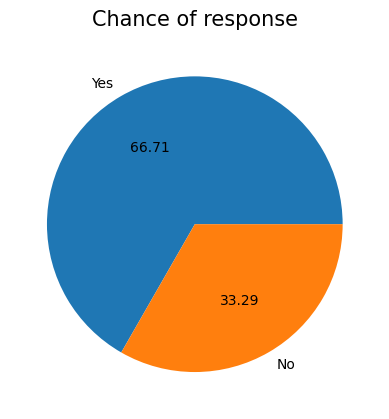

In [ ]:
chart_response = df_ticket['Response'].value_counts()
plt.pie(chart_response, labels = chart_response.index, autopct = '%.2f')
plt.title('Chance of response', loc = 'center', pad = 10, size = 15)
plt.show()

💬 Comment: 66.71% ticket sent was responsed by the technical staff.

### Chance of Resolution

In [ ]:
chance_reso = []
for result in df_ticket['Time to Resolution']:
    if result == 'No resolution':
        chance_reso.append('No')
    else:
        chance_reso.append('Yes')
df_ticket['Resolution_bin'] = chance_reso

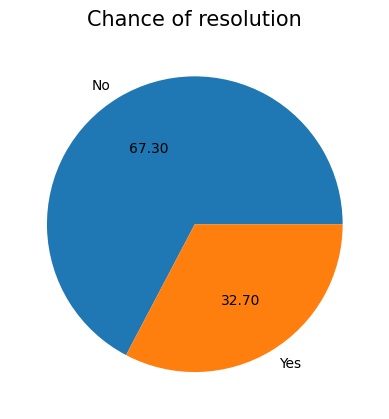

In [ ]:
chart_reso = df_ticket['Resolution_bin'].value_counts()
plt.pie(chart_reso, labels = chart_reso.index, autopct = '%.2f')
plt.title('Chance of resolution', loc = 'center', pad = 10, size = 15)
plt.show()

💬 Comment: 32.70% cases sent was resolved by the technical staff.

### Distribution of Customer Satisfaction Rating

💬 Comment: In the data structure, customer satisfaction ratings range from 1 to 5. A higher rating indicates better quality of service provided by the Support Ticket Department.

In [ ]:
#Convert 'Customer Satisfaction Rating' columns into object type
df_ticket['Customer Satisfaction Rating'] = df_ticket['Customer Satisfaction Rating'].astype('object')
df_ticket['Customer Satisfaction Rating'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 8469 entries, 0 to 8468
Series name: Customer Satisfaction Rating
Non-Null Count  Dtype 
--------------  ----- 
8469 non-null   object
dtypes: object(1)
memory usage: 66.3+ KB


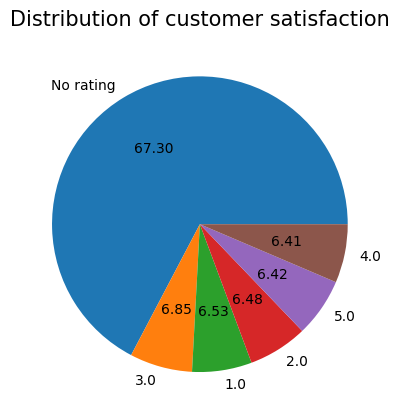

In [ ]:
chart_satisfaction = df_ticket['Customer Satisfaction Rating'].value_counts()
plt.pie(chart_satisfaction, labels = chart_satisfaction.index, autopct = '%.2f')
plt.title('Distribution of customer satisfaction', loc = 'center', pad = 10, size = 15)
plt.show()

Conclusion:

- The company primarily provides IT products to customers aged 30 and above, serving all genders.

- There is a balanced distribution of cases submitted through the ticketing system across different priority levels.

- Only 32.70% of submitted cases were resolved, indicating a need to improve support efficiency.

- Customer satisfaction ratings were evenly distributed across all levels, showing that the Support Ticket Department performs moderately.

- To enhance performance, the department should focus on increasing resolution rates and improving customer satisfaction through better service quality and responsiveness.

# Discovering Relationships between Columns

### Ticket Channel and Ticket Priority

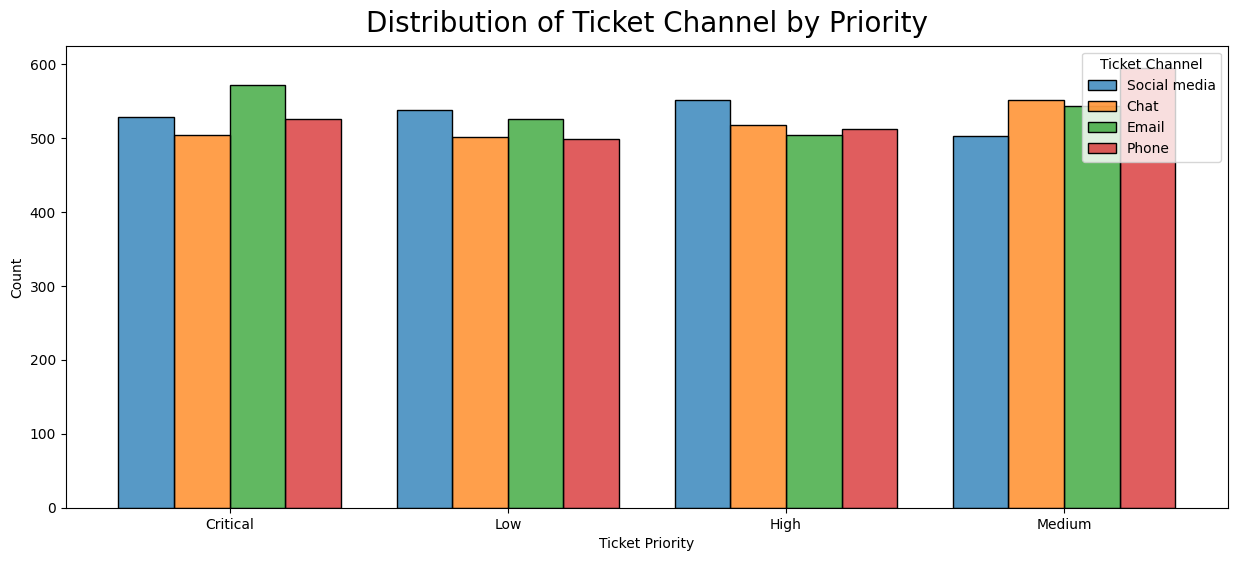

In [ ]:
plt.figure(figsize = (15,6))
sns.histplot(df_ticket, hue = 'Ticket Channel', x = 'Ticket Priority',multiple = 'dodge', shrink = 0.8)
plt.title('Distribution of Ticket Channel by Priority', loc = 'center', pad = 10, size = 20)
plt.show()

💬 Comment: Although each ticket channel has similar in number of cases was sent, but:

- Email is the channel has the most cases was ranked critical level
- Social media is the channel customers

### Ticket Priority and Solution

In [ ]:
#Create a pivot table for caculating
priority = pd.pivot_table(df_ticket, index = ['Ticket Priority'], values = ['Customer Name'], columns = ['Resolution_bin'], aggfunc = len).reset_index()
priority = priority.rename(columns = {'Customer Name': 'Chance of Solution'})
priority['Percent'] = (priority['Chance of Solution']['Yes']/priority['Chance of Solution']['No'])*100
priority

Ticket Priority Chance of Solution         Percent
Resolution_bin                                 No  Yes           
0                     Critical               1403  726  51.746258
1                         High               1380  705  51.086957
2                          Low               1419  644  45.384073
3                       Medium               1498  694  46.328438

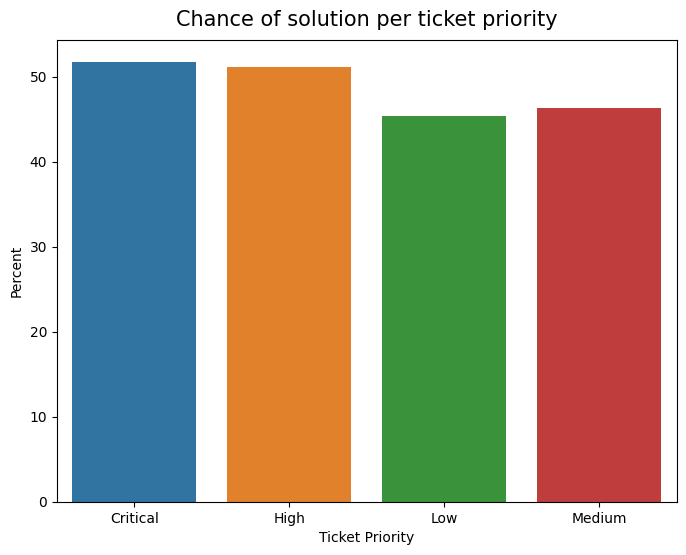

In [ ]:
plt.figure(figsize = (8,6))
sns.barplot(priority, x = 'Ticket Priority', y = 'Percent', hue = 'Ticket Priority')
plt.title('Chance of solution per ticket priority', loc = 'center', pad = 10, size = 15)
plt.show()

💬 Comment: High and Critical priority ticket only have a slightly higher in chance of solution than low and medium.

### Customer Satisfaction Rating

In [ ]:
#Create a pivot table for caculating
rating = pd.pivot_table(df_ticket, index = ['Customer Satisfaction Rating'], values= ['Customer Name'], columns = ['Resolution_bin'], aggfunc = len).reset_index()
rating = rating.rename(columns = {'Customer Name': 'Resolution'})
rating

Customer Satisfaction Rating Resolution       
Resolution_bin                                      No    Yes
0                                       1.0        NaN  553.0
1                                       2.0        NaN  549.0
2                                       3.0        NaN  580.0
3                                       4.0        NaN  543.0
4                                       5.0        NaN  544.0
5                                 No rating     5700.0    NaN

💬 Comment: Because all rating from customers were in resolution problems, so I will create a new dataframe contains all data of resolution cases for a deeper look in rating.

In [ ]:
#Create new dataframe
df_resolution = df_ticket[df_ticket['Resolution_bin'] =='Yes']
df_resolution.head(5)

,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating,Type of Customer,Response,Resolution_bin
2,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0,Middle Age Customer,Yes,Yes
3,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0,Young Customer,Yes,Yes
4,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0,Old Customer,Yes,Yes
10,Joseph Moreno,mbrown@example.org,48,Male,Nintendo Switch,2021-01-19,Cancellation request,Data loss,I'm having an issue with the {product_purchase...,Closed,Measure tonight surface feel forward.,High,Phone,2023-06-01 17:46:49,2023-05-31 23:51:49,1.0,Middle Age Customer,Yes,Yes
11,Brandon Arnold,davisjohn@example.net,51,Male,Microsoft Xbox Controller,2021-10-24,Product inquiry,Software bug,I'm having an issue with the {product_purchase...,Closed,Measure there house management pick knowledge ...,High,Chat,2023-06-01 12:05:51,2023-06-01 09:27:51,1.0,Middle Age Customer,Yes,Yes


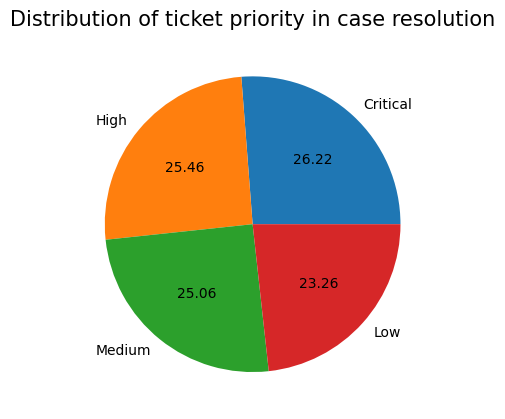

In [ ]:
chart_reprio = df_resolution['Ticket Priority'].value_counts()
plt.pie(chart_reprio, labels = chart_reprio.index, autopct = '%.2f')
plt.title('Distribution of ticket priority in case resolution', loc = 'center', pad = 10, size = 15)
plt.show()

💬 Comment: For a clearly look, I will put "Low" for the score 1 and 2, "Medium" for 3, and "High" for 4 and 5.

In [ ]:
rating = []
for result in df_resolution['Customer Satisfaction Rating']:
    if result<=2:
        rating.append('Low')
    elif result==3:
        rating.append('Medium')
    else:
        rating.append('High')
df_resolution['Type of rating'] = rating

/tmp/ipython-input-2302165483.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_resolution['Type of rating'] = rating


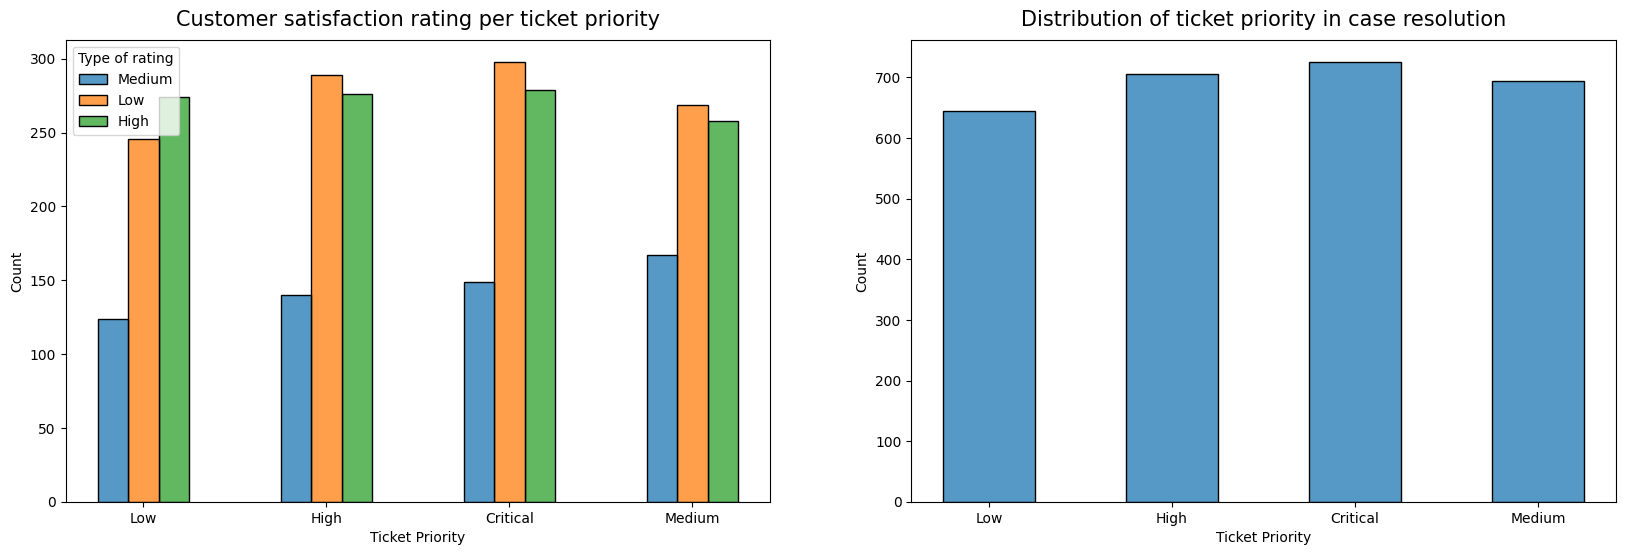

In [ ]:
#Customer satisfaction rating and ticket priority
fig, axes = plt.subplots(1,2, figsize = (20,6))
sns.histplot(df_resolution, x = 'Ticket Priority', hue = 'Type of rating' ,multiple = 'dodge', shrink = 0.5, ax = axes[0])
sns.histplot(df_resolution['Ticket Priority'], shrink = 0.5, ax = axes[1])
axes[0].set_title('Customer satisfaction rating per ticket priority', loc = 'center', pad = 10, size = 15)
axes[1].set_title('Distribution of ticket priority in case resolution', loc = 'center', pad = 10, size = 15)
plt.show()

💬 Comment: As we see above, the distribution of rating scores and priority are quite similar. However:

- Critical tickets are graded highest priority but also a priority have most number of customer gave low rating score
- This priority also reach the highest in number of customers judged high score but the number of cases given low rating were more than high rating.
- The second rank in both low and high rating were high priority.

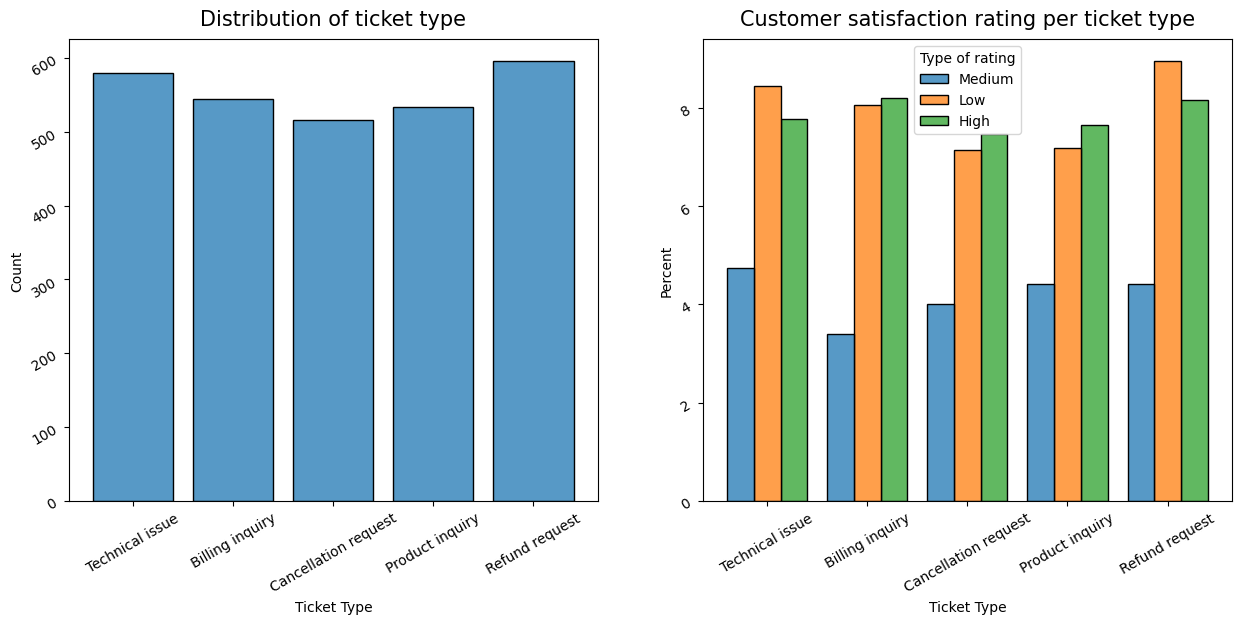

In [ ]:
#Customer satisfaction rating and ticket type
fig, axes = plt.subplots(1,2, figsize = (15,6))
sns.histplot(df_resolution['Ticket Type'], shrink = 0.8, ax = axes[0])
sns.histplot(hue = df_resolution['Type of rating'], x = df_resolution['Ticket Type'], multiple = 'dodge', shrink = 0.8, stat = 'percent', ax = axes[1])
axes[0].tick_params(labelrotation = 30)
axes[1].tick_params(labelrotation = 30)
axes[0].set_title('Distribution of ticket type', loc = 'center', pad = 10, size = 15)
axes[1].set_title('Customer satisfaction rating per ticket type', loc = 'center', pad = 10, size = 15)
plt.show()

💬 Comment:

- Refund request and technical issue are two problems had more low rating score than high rating score.
- Refund request was the type had the most ticket resolved but also the type got the most low rating score.
- The remain types worked well and kept the amount of high rating score more than low rating score.

# Sentiment Analysis

In [ ]:
# Initialize the text analysis pipeline
sentiment_model = "cardiffnlp/twitter-roberta-base-sentiment"
classifier = pipeline("sentiment-analysis", model=sentiment_model, tokenizer=sentiment_model)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

Device set to use cpu


In [ ]:
sample_text = "I hate you."
classifier(sample_text)

[{'label': 'LABEL_0', 'score': 0.9608865976333618}]

In [ ]:
from sklearn.model_selection import train_test_split

# Get 20% stratified sample by "Customer Gender"
df_smaller, _ = train_test_split(df_ticket, test_size=0.80, stratify=df_ticket['Customer Gender'], random_state=42)
# Keep 80% out, so you get 20% in df_smaller

print(f'Original size: {len(df_ticket)}')
print(f'Sampled size: {len(df_smaller)}')

Original size: 8469
Sampled size: 1693


In [ ]:
# Drop these columns because it is not necessary on the modelling I am formulating

df_smaller.drop(columns=['Customer Email'], inplace = True)
df_smaller.drop(columns=['Customer Name'], inplace = True)

In [ ]:
# Use the classifier model to the dataframe
results = classifier(df_smaller['Ticket Description'].tolist())

#Creating new column in the dataframe to store the results
df_smaller['sentiment_label'] = [result['label'] for result in results]
df_smaller['sentiment_score'] = [result['score'] for result in results]

In [ ]:
df_smaller.head(5)

,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating,Type of Customer,Response,Resolution_bin,sentiment_label,sentiment_score
8397,59,Female,Dell XPS,2020-07-17,Cancellation request,Cancellation request,I'm having an issue with the {product_purchase...,Closed,Because individual section grow.,Medium,Email,2023-06-01 06:30:51,2023-06-01 15:11:51,2.0,Old Customer,Yes,Yes,LABEL_0,0.639141
2952,51,Other,Adobe Photoshop,2021-12-11,Cancellation request,Installation support,I'm having an issue with the {product_purchase...,Pending Customer Response,None,High,Phone,2023-06-01 15:50:37,No resolution,No rating,Middle Age Customer,Yes,No,LABEL_1,0.446878
5961,30,Female,LG Smart TV,2021-12-22,Billing inquiry,Installation support,I'm having an issue with the {product_purchase...,Closed,Worry director modern institution.,Medium,Email,2023-06-01 19:22:39,2023-06-01 17:27:39,5.0,Young Customer,Yes,Yes,LABEL_0,0.738626
1363,46,Female,Adobe Photoshop,2021-08-28,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Pending Customer Response,None,Medium,Social media,2023-06-01 21:43:00,No resolution,No rating,Middle Age Customer,Yes,No,LABEL_0,0.700531
3598,55,Female,Asus ROG,2020-02-16,Cancellation request,Product setup,I'm having an issue with the {product_purchase...,Closed,Too never page walk tax five.,High,Phone,2023-06-01 10:53:23,2023-06-01 02:15:23,5.0,Old Customer,Yes,Yes,LABEL_0,0.624675


# Preprocessing

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Drop the problematic columns from df_ticket to create a processed DataFrame
# Explicitly drop 'Customer Satisfaction Rating' as it has mixed types after fillna (No Rating)
df_smaller_processed = df_ticket.drop(columns=['Date of Purchase', 'First Response Time', 'Time to Resolution', 'Customer Satisfaction Rating'])

# Define the numerical columns from the processed DataFrame
num_cols = df_smaller_processed.select_dtypes(include=['int', 'float']).columns.tolist()

# Define the categorical columns from the processed DataFrame
# Now, select all object columns since 'Customer Satisfaction Rating' is removed
cat_cols = df_smaller_processed.select_dtypes(include='object').columns.tolist()


trans_pipeline = ColumnTransformer([
    ("num", SimpleImputer(strategy='median'), num_cols),
    ("scaler", StandardScaler(), num_cols),
    ("cat", OneHotEncoder(handle_unknown='ignore'), cat_cols)
])

In [ ]:
df_smaller_trans = trans_pipeline.fit_transform(df_smaller_processed)

# Dimensionality Reduction

In [ ]:
from sklearn.decomposition import PCA

pca_model = PCA(n_components=2)
df_pca = pca_model.fit_transform(df_smaller_trans)

/tmp/ipython-input-1405574701.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x = df_pca[:, 0], y = df_pca[:, 1], cmap='viridis', s= 50)


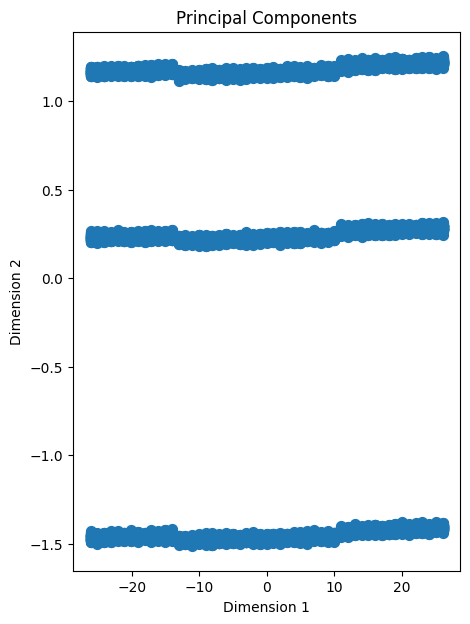

In [ ]:
plt.figure(figsize = (5,7))
plt.scatter(x = df_pca[:, 0], y = df_pca[:, 1], cmap='viridis', s= 50)
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Principal Components')
plt.show()

# KMeans Clustering

In [ ]:
from sklearn.cluster import KMeans

kmeans_model = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans_model.fit_predict(df_pca)

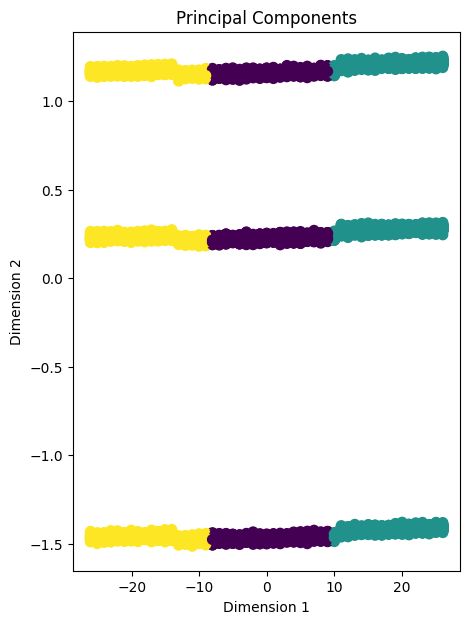

In [ ]:
plt.figure(figsize = (5,7))
plt.scatter(x = df_pca[:, 0], y = df_pca[:, 1], c=clusters ,cmap='viridis', s= 50)
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Principal Components')
plt.show()

# Elbow Method

In [ ]:
inertias = []
number_clusters = range(1, 15)

for number_cluster in number_clusters:
  kmeans_model = KMeans(n_clusters = number_cluster, random_state=42, n_init=10)
  kmeans_model.fit(df_pca)
  inertias.append(kmeans_model.inertia_)

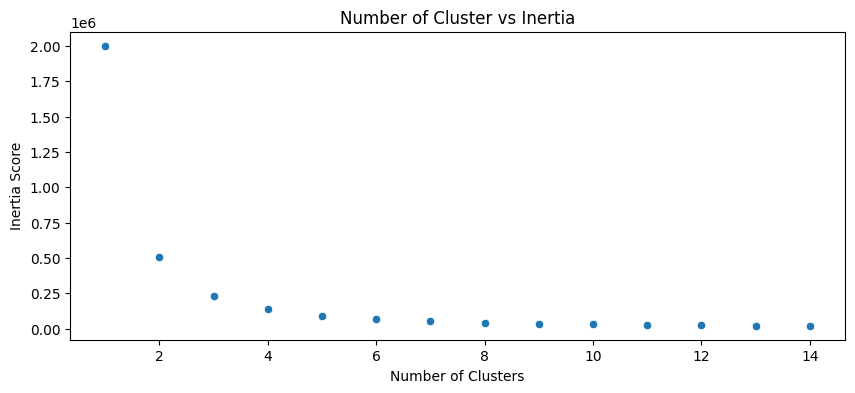

In [ ]:
plt.figure(figsize=(10,4))
sns.scatterplot(x=number_clusters, y=inertias)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia Score')
plt.title('Number of Cluster vs Inertia')
plt.show()

In [ ]:
df_smaller_processed['Cluster'] = clusters

In [ ]:
df_smaller_processed.head(5)

,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,Type of Customer,Response,Resolution_bin,Cluster
0,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,None,Critical,Social media,Middle Age Customer,Yes,No,2
1,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,None,Critical,Chat,Middle Age Customer,Yes,No,0
2,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,Middle Age Customer,Yes,Yes,0
3,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,Young Customer,Yes,Yes,2
4,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,Old Customer,Yes,Yes,1


# Zero Shot Classification

In [ ]:
from transformers import pipeline

candidate_labels = ['Refund Request', 'Complaint', 'Technical Problem', 'Feedback', 'Suggestion', 'Product Inquiry']

In [ ]:
classifier = pipeline('zero-shot-classification', model='facebook/bart-large-mnli')

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cpu


In [ ]:
sample_text = 'Im facing a problem with my product purchased.'

In [ ]:
result = classifier(sample_text, candidate_labels)

In [ ]:
result['labels'][0]

'Complaint'

In [ ]:
from sklearn.model_selection import train_test_split

# Get a smaller sample from df_smaller for zero-shot classification
# Use a simple random split instead of stratifying by 'Ticket Description'
df_zeroshot, _ = train_test_split(df_smaller, test_size=0.75, random_state=42)


print(f"Original size (df_smaller): {len(df_smaller)}")
print(f"Sampled size (df_zeroshot): {len(df_zeroshot)}")

Original size (df_smaller): 1693
Sampled size (df_zeroshot): 423


In [ ]:
# Function to classify topics with token truncation
def get_topic(text):
    if not isinstance(text, str):
        return None

    result = classifier(
        text,
        candidate_labels,
        max_length=200,       # Limit to 200 tokens
        truncation=True       # Automatically truncate longer text
    )

    # Return only the most probable topic
    return result['labels'][0]

In [ ]:
df_zeroshot['Topic'] = df_zeroshot['Ticket Description'].apply(get_topic)

In [ ]:
df_zeroshot['Topic'].value_counts()

,count
Topic,
Complaint,199
Suggestion,96
Product Inquiry,82
Feedback,29
Technical Problem,16
Refund Request,1


# Unsupervised Topic Modelling

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vectorizer = TfidfVectorizer(stop_words = "english", max_features = 10)

In [ ]:
vectorized_text = vectorizer.fit_transform(df['Ticket Description'])

In [ ]:
def get_keywords(row_index, top_n_words = 5):
  row = vectorized_text[row_index].toarray()[0]
  top_indices = row.argsort()[-top_n_words:][::-1] # indetify the index of the top keywords

  return [vectorizer.get_feature_names_out()[i] for i in top_indices]

In [ ]:
df_ticket['keywords'] = [get_keywords(i) for i in range(len(df_ticket))]

In [ ]:
df['keywords']

,keywords
0,"[issue, ve, assist, having, product_purchased]"
1,"[issue, assist, having, product, product_purch..."
2,"[product_purchased, problem, software, ve, pro..."
3,"[problem, issue, ve, assist, having]"
4,"[product_purchased, ve, assist, having, issue]"
...,...
8464,"[issue, product_purchased, software, ve, product]"
8465,"[issue, assist, having, product_purchased, sof..."
8466,"[problem, product_purchased, ve, assist, having]"
8467,"[issue, product_purchased, product, ve, assist]"


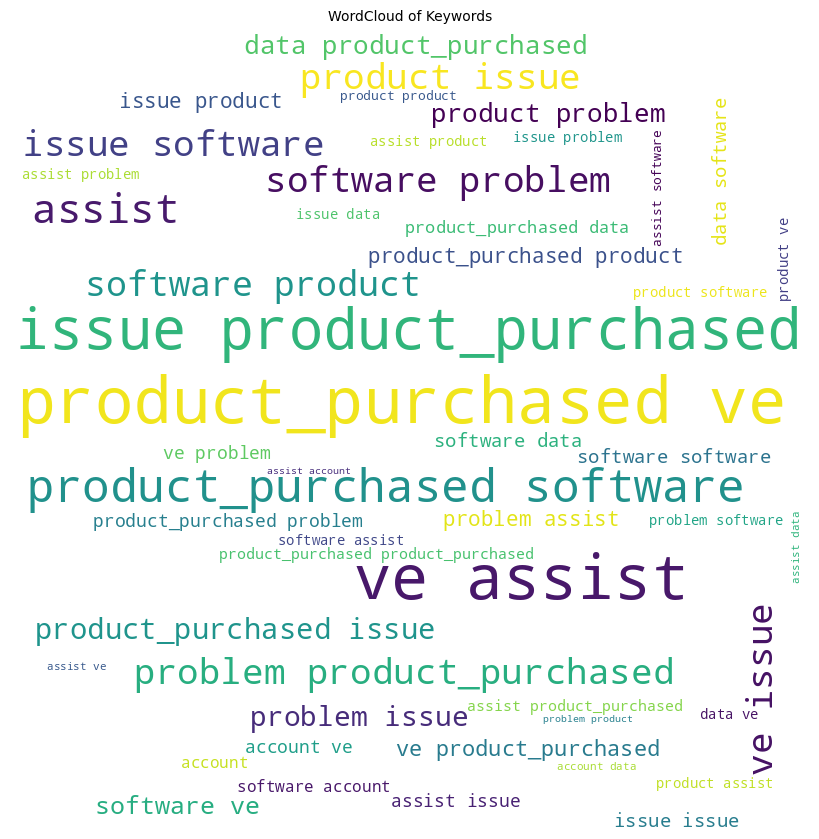

In [ ]:
from wordcloud import WordCloud

def plot_wordcloud(text, mask=None, color='white', max_font_size=None, title_size=None, title="WordCloud"):

    wordcloud = WordCloud(width=800, height=800,
                          background_color=color,
                          mask=mask,
                          stopwords=None,
                          max_font_size=max_font_size,
                          min_font_size=10).generate(text)

    plt.figure(figsize=(8, 8), facecolor=None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)

    plt.title(title, size=title_size)
    plt.show()

# Flatten the list of keywords
all_keywords = [keyword for sublist in df['keywords'] for keyword in sublist]

# Join the keywords into a single string
text = " ".join(all_keywords)

# Generate the word cloud using the defined function
plot_wordcloud(text, title="WordCloud of Keywords")

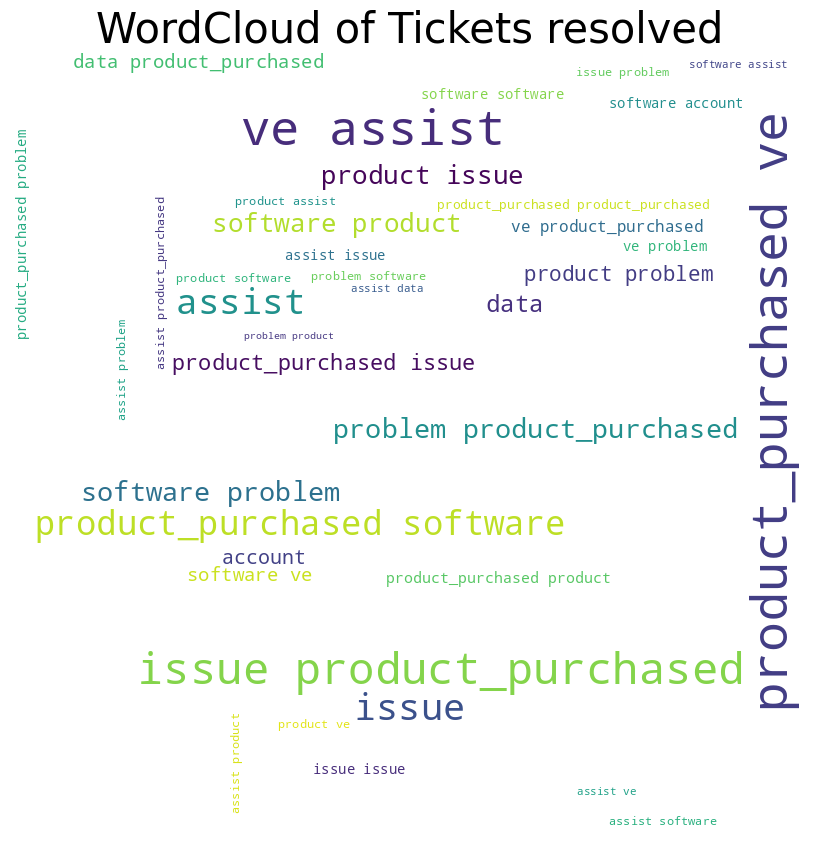

In [ ]:
# Flatten the list of keywords for resolved tickets
resolved_keywords = [keyword for sublist in df_ticket[df_ticket['Resolution_bin'] == 'Yes']['keywords'] for keyword in sublist]

# Join the keywords into a single string
resolved_text = " ".join(resolved_keywords)

plot_wordcloud(resolved_text, mask=None, color='white', max_font_size=50, title_size=30, title="WordCloud of Tickets resolved")

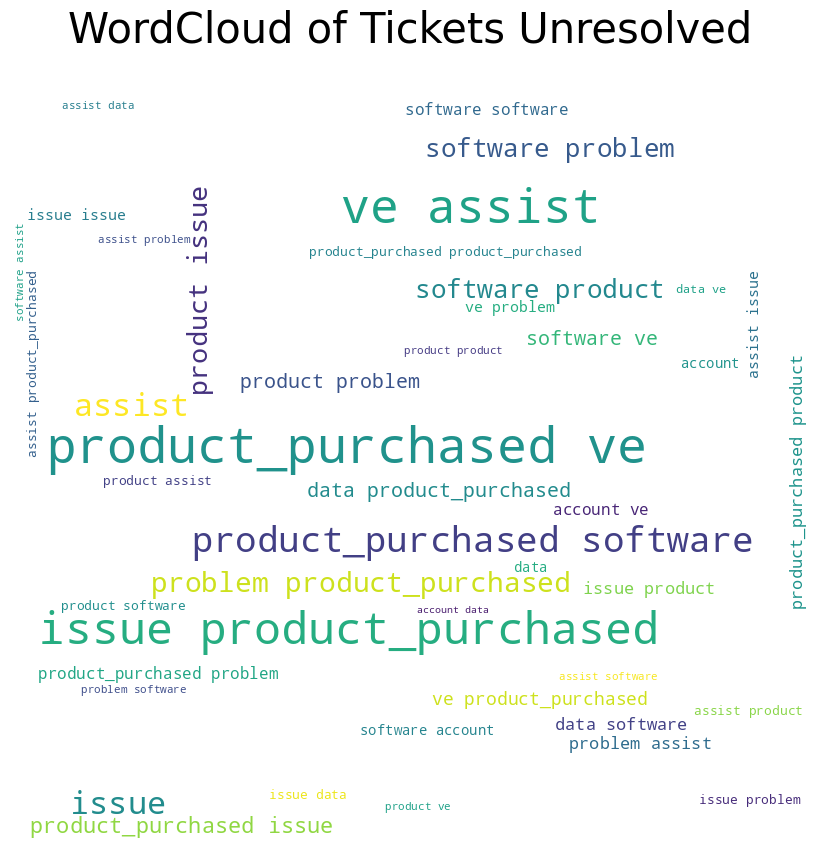

In [ ]:
# Flatten the list of keywords for unresolved tickets
resolved_keywords = [keyword for sublist in df_ticket[df_ticket['Resolution_bin'] == 'No']['keywords'] for keyword in sublist]

# Join the keywords into a single string
resolved_text = " ".join(resolved_keywords)

plot_wordcloud(resolved_text, mask=None, color='white', max_font_size=50, title_size=30, title="WordCloud of Tickets Unresolved")

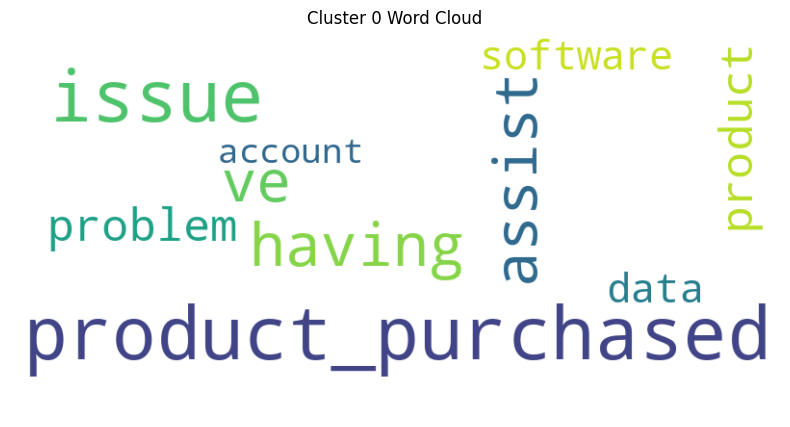

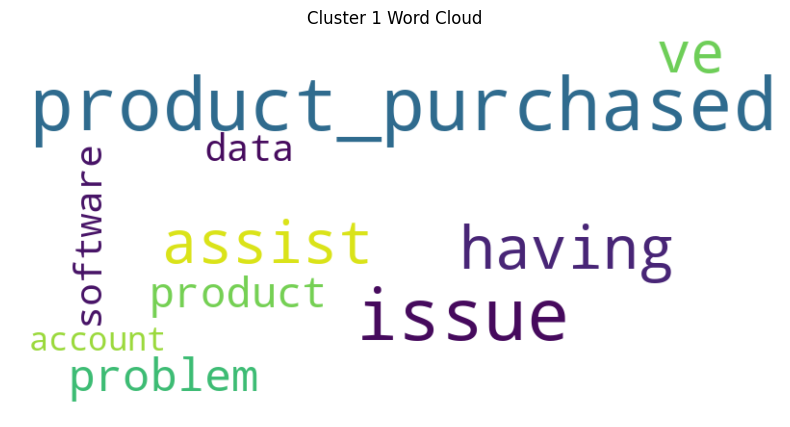

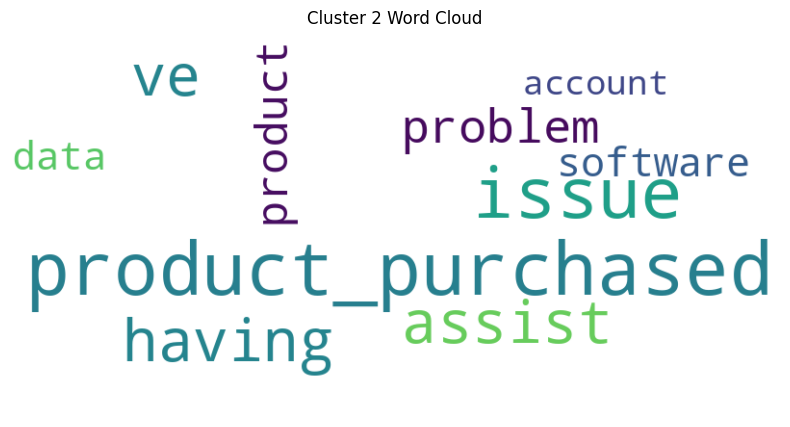

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np

def make_wordcloud_for_cluster(cluster_id, clusters, vectorized_text, vectorizer, max_words=100):
    """
    cluster_id: integer label of the cluster
    clusters: array or list of cluster labels for each document
    vectorized_text: TFIDF matrix (n_docs x n_terms)
    vectorizer: the fitted TfidfVectorizer

    Returns a WordCloud object (and also plots it).
    """
    # find documents in that cluster
    doc_indices = np.where(clusters == cluster_id)[0]
    if len(doc_indices) == 0:
        print(f"No documents in cluster {cluster_id}")
        return None

    # sum the TF-IDF vectors of those docs
    # this gives a vector of size n_terms with aggregate “importance” in this cluster
    cluster_tfidf_sum = vectorized_text[doc_indices].sum(axis=0)  # this is a 1×n_terms sparse or dense row
    # convert to array
    if hasattr(cluster_tfidf_sum, "A1"):  # for scipy sparse result
        freq = cluster_tfidf_sum.A1
    else:
        # if already dense
        freq = cluster_tfidf_sum.flatten()

    # get mapping term -> weight
    terms = vectorizer.get_feature_names_out()
    term_weights = {terms[i]: freq[i] for i in range(len(terms)) if freq[i] > 0}

    # generate word cloud
    wc = WordCloud(width=800, height=400, background_color="white")
    wc = wc.generate_from_frequencies(term_weights)

    # plot
    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Cluster {cluster_id} Word Cloud")
    plt.show()

    return wc

# Suppose your cluster labels are in `clusters`
# And you know how many clusters (say k)
k = len(set(clusters))  # or your chosen k

for cid in range(k):
    make_wordcloud_for_cluster(cid, clusters, vectorized_text, vectorizer, max_words=100)